In [1]:
import pandas as pd
from config import Config

config = Config()

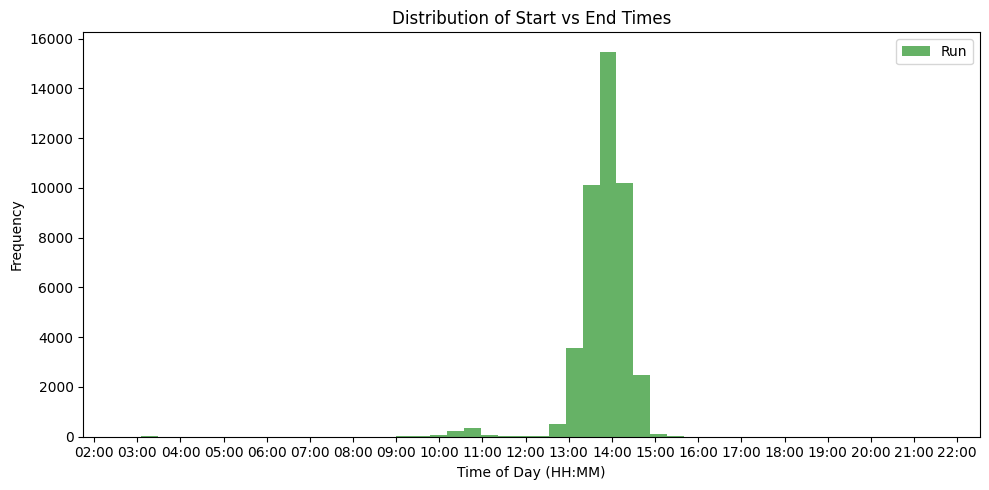

In [13]:

config = Config()

firms = pd.read_csv(config.LABEL_DATA_PATH, parse_dates=['start_time', 'end_time'])

# get minute of the day for start and end times
firms['start_minute_of_day'] = firms['start_time'].dt.hour * 60 + firms['start_time'].dt.minute
firms['end_minute_of_day'] = firms['end_time'].dt.hour * 60 + firms['end_time'].dt.minute
# find mid-point of start and end times
firms['run'] = (firms['end_minute_of_day']  - firms['start_minute_of_day']) / 2 + firms['start_minute_of_day']

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot histograms together
fig, ax = plt.subplots(figsize=(10, 5))

#ax.hist(firms["start_minute_of_day"], bins=48, alpha=0.6, label="Start", color="blue")
#ax.hist(firms["end_minute_of_day"], bins=48, alpha=0.6, label="End", color="orange")
ax.hist(firms["run"], bins=48, alpha=0.6, label="Run", color="green")

# Format x-axis to show HH:MM
def minute_formatter(x, pos):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f"{hours:02d}:{minutes:02d}"

ax.xaxis.set_major_locator(ticker.MultipleLocator(60))   # tick every 60 minutes
ax.xaxis.set_major_formatter(ticker.FuncFormatter(minute_formatter))

ax.set_xlabel("Time of Day (HH:MM)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Start vs End Times")
ax.legend()

plt.tight_layout()
plt.show()

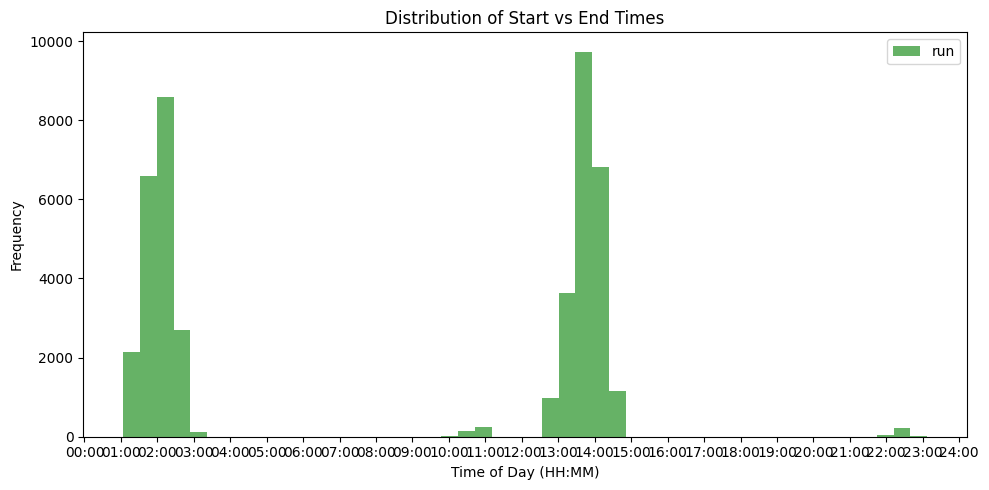

In [17]:
firms = pd.read_csv(config.FIRMS_DATA_PATH)
firms["utc_time"] = pd.to_datetime(
    firms["acq_date"].astype(str) + " " + firms["acq_time"].astype(str).str.zfill(4),
    format="%Y-%m-%d %H%M"
)



# Configurable local time offset in minutes (example: UTC+7h = 420 minutes)
local_offset_minutes = 420  

firms["local_time"] = firms["utc_time"] + pd.to_timedelta(local_offset_minutes, unit="m")
firms['local_time_in_minutes'] = firms['local_time'].dt.hour * 60 + firms['local_time'].dt.minute
firms.head()

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(firms["local_time_in_minutes"], bins=48, alpha=0.6, label="run", color="green")


# Format x-axis to show HH:MM
def minute_formatter(x, pos):
    hours = int(x // 60)
    minutes = int(x % 60)
    return f"{hours:02d}:{minutes:02d}"

ax.xaxis.set_major_locator(ticker.MultipleLocator(60))   # tick every 60 minutes
ax.xaxis.set_major_formatter(ticker.FuncFormatter(minute_formatter))

ax.set_xlabel("Time of Day (HH:MM)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Start vs End Times")
ax.legend()

plt.tight_layout()
plt.show()
